In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [34]:
#Ganti Nama Annual Income dan Spending Score tanpa spasih dan kurung
df.rename(columns={"Annual Income (k$)": "Annual Income", "Spending Score (1-100)": "Spending Score"}, inplace=True)
df.head()


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
df.shape

(200, 5)

In [38]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [39]:
df.duplicated().sum()

0

In [40]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

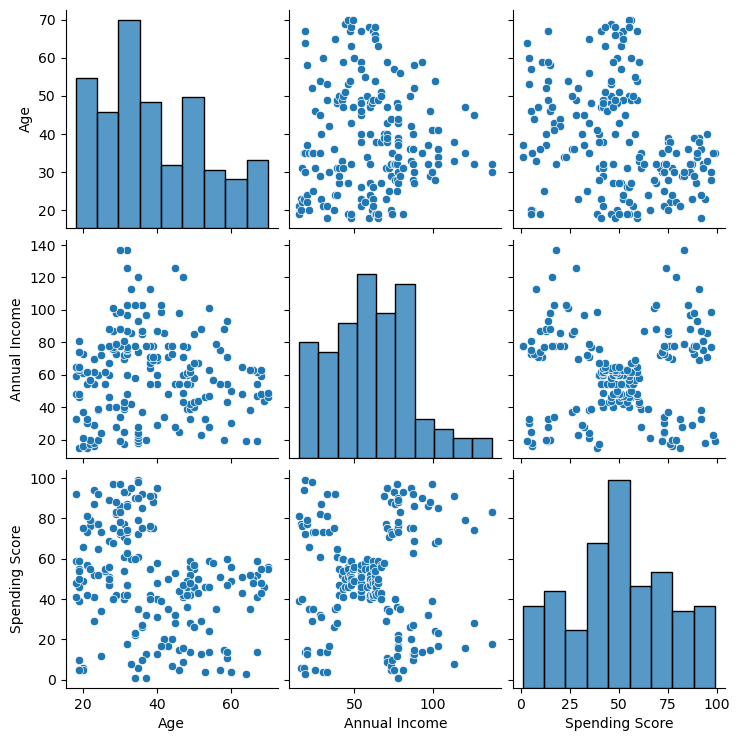

In [41]:
# EDA 
sns.pairplot(df[['Age','Annual Income', 'Spending Score']])
plt.show()

In [42]:
#Cek Outlier
def cek_outlier(data):
    """
    Mengecek jumlah dan persentase outlier di setiap kolom numerik.
    """
    numeric_cols = data.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outlier_count = ((data[col] < lower) | (data[col] > upper)).sum()
        total = len(data[col])
        percentage = outlier_count / total * 100

        print(f"{col}: {outlier_count} outliers ({percentage:.2f}%)")



In [43]:
cek_outlier(df)

CustomerID: 0 outliers (0.00%)
Age: 0 outliers (0.00%)
Annual Income: 2 outliers (1.00%)
Spending Score: 0 outliers (0.00%)


In [44]:
#Inisialisasi X

X_numeric = df.drop(['CustomerID', 'Gender'], axis=1)
X_numeric


,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [45]:
print(X_numeric['Age'].skew())
print(X_numeric['Annual Income'].skew())
print(X_numeric['Spending Score'].skew())

0.48556885096681657
0.3218425498619055
-0.047220201374263374


In [46]:
#GAnti urutan age income spending score jangan kebolak balik

In [47]:
#Transformasi
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler

# === 4. Transformasi (scaling) ===
ct = ColumnTransformer([
    ('standard', StandardScaler(), ['Age', 'Spending Score']),
    ('robust', RobustScaler(), ['Annual Income'])
])
# transformasi
X_numeric_scaled = ct.fit_transform(X_numeric)

# karena ct urutannya Age, Spending Score, Annual Income
# kita bisa susun ulang ke AAS
X_numeric_scaled_df = pd.DataFrame(
    X_numeric_scaled[:, [0, 2, 1]],  # pindahkan kolom AnnualIncome ke posisi kedua
    columns=['Age', 'Annual Income', 'Spending Score']  # AAS
)

In [48]:
X_numeric_scaled

array([[-1.42456879, -0.43480148, -1.2739726 ],
       [-1.28103541,  1.19570407, -1.2739726 ],
       [-1.3528021 , -1.71591298, -1.24657534],
       [-1.13750203,  1.04041783, -1.24657534],
       [-0.56336851, -0.39597992, -1.21917808],
       [-1.20926872,  1.00159627, -1.21917808],
       [-0.27630176, -1.71591298, -1.19178082],
       [-1.13750203,  1.70038436, -1.19178082],
       [ 1.80493225, -1.83237767, -1.16438356],
       [-0.6351352 ,  0.84631002, -1.16438356],
       [ 2.02023231, -1.4053405 , -1.16438356],
       [-0.27630176,  1.89449216, -1.16438356],
       [ 1.37433211, -1.36651894, -1.1369863 ],
       [-1.06573534,  1.04041783, -1.1369863 ],
       [-0.13276838, -1.44416206, -1.1369863 ],
       [-1.20926872,  1.11806095, -1.1369863 ],
       [-0.27630176, -0.59008772, -1.10958904],
       [-1.3528021 ,  0.61338066, -1.10958904],
       [ 0.94373197, -0.82301709, -1.05479452],
       [-0.27630176,  1.8556706 , -1.05479452],
       [-0.27630176, -0.59008772, -1.027

In [49]:
X_categoric= df['Gender']
X_categoric

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [50]:
X_categoric = pd.get_dummies(df['Gender']).astype(float)


In [51]:
X_concat = pd.concat(
    [X_numeric_scaled_df.reset_index(drop=True), 
     X_categoric.reset_index(drop=True)],
    axis=1
)

In [52]:
X_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             200 non-null    float64
 1   Annual Income   200 non-null    float64
 2   Spending Score  200 non-null    float64
 3   Female          200 non-null    float64
 4   Male            200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [53]:
X_concat

,Age,Annual Income,Spending Score,Female,Male
0,-1.424569,-1.273973,-0.434801,0.0,1.0
1,-1.281035,-1.273973,1.195704,0.0,1.0
2,-1.352802,-1.246575,-1.715913,1.0,0.0
3,-1.137502,-1.246575,1.040418,1.0,0.0
4,-0.563369,-1.219178,-0.395980,1.0,0.0
...,...,...,...,...,...
195,-0.276302,1.602740,1.118061,1.0,0.0
196,0.441365,1.767123,-0.861839,1.0,0.0
197,-0.491602,1.767123,0.923953,0.0,1.0
198,-0.491602,2.068493,-1.250054,0.0,1.0


In [54]:
2aaasa

SyntaxError: invalid decimal literal (3942897543.py, line 1)

In [ ]:
#Moddeling Clustering


Dalam clustering, biasanya dipakai rule of thumb untuk jumlah cluster awal:

2≤ 𝑐 ≤ √𝑁 atau √𝑁/2 
	​

N = jumlah sampel (di sini 200)

√200 ≈ 14

Jadi secara teori kita bisa coba sampai 14 cluster

# K Means

k = 2 : Inertia = 390.70
k = 3 : Inertia = 321.52
k = 4 : Inertia = 266.65
k = 5 : Inertia = 246.36
k = 6 : Inertia = 227.09
k = 7 : Inertia = 182.81
k = 8 : Inertia = 159.14
k = 9 : Inertia = 143.37
k = 10 : Inertia = 132.17
k = 11 : Inertia = 127.48
k = 12 : Inertia = 111.99
k = 13 : Inertia = 100.95
k = 14 : Inertia = 91.58


c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-pa

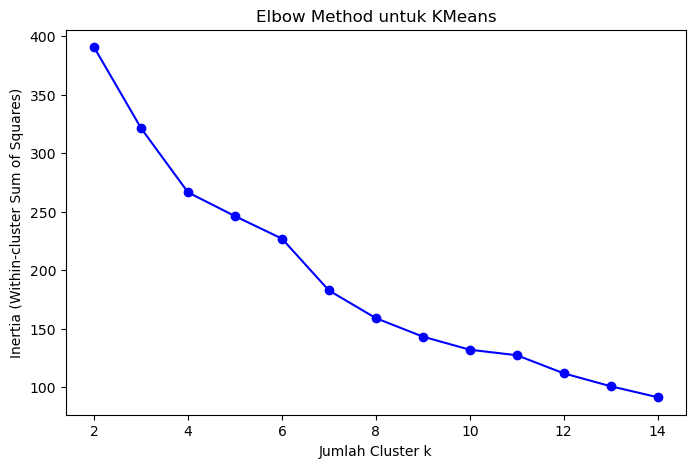

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range cluster yang dicoba
k_range = range(2, 15)
inertia_list = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_concat)
    inertia_list.append(kmeans.inertia_)  # inertia = sum of squared distances

# -------------------------------
# 1. Tampilkan nilai inertia
# -------------------------------
for k, inertia in zip(k_range, inertia_list):
    print(f"k = {k} : Inertia = {inertia:.2f}")

# -------------------------------
# 2. Plot Elbow
# -------------------------------
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia_list, 'bo-')
plt.xlabel('Jumlah Cluster k')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method untuk KMeans')
plt.show()


c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-pa

K=2, Silhouette Score = 0.3146
K=3, Silhouette Score = 0.2768
K=4, Silhouette Score = 0.2815
K=5, Silhouette Score = 0.2602
K=6, Silhouette Score = 0.2702
K=7, Silhouette Score = 0.3193
K=8, Silhouette Score = 0.3390
K=9, Silhouette Score = 0.3481
K=10, Silhouette Score = 0.3629
K=11, Silhouette Score = 0.3559
K=12, Silhouette Score = 0.3726
K=13, Silhouette Score = 0.3798


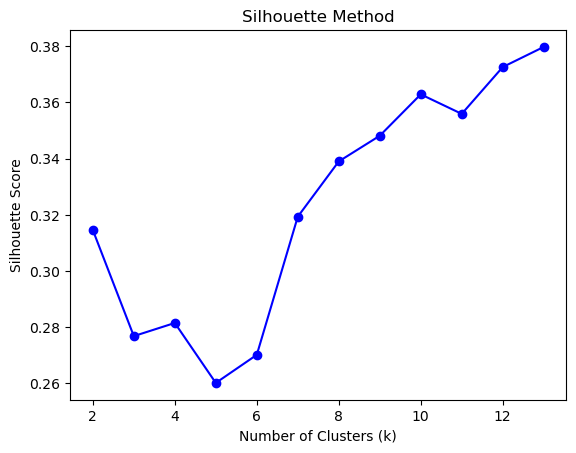

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(2, 14)   # mulai dari 2 cluster
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_concat)
    sil_score = silhouette_score(X_concat, labels)
    silhouette_scores.append(sil_score)

# Print nilai
for k, score in zip(K, silhouette_scores):
    print(f"K={k}, Silhouette Score = {score:.4f}")

# Plot
import matplotlib.pyplot as plt
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


#Nilai Silhoute Score tertinggi itu yg paling bagus

c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-pa

K=2, Davies-Bouldin Score = 1.3087
K=3, Davies-Bouldin Score = 1.4112
K=4, Davies-Bouldin Score = 1.3822
K=5, Davies-Bouldin Score = 1.2770
K=6, Davies-Bouldin Score = 1.1914
K=7, Davies-Bouldin Score = 1.1227
K=8, Davies-Bouldin Score = 1.0326
K=9, Davies-Bouldin Score = 1.0444
K=10, Davies-Bouldin Score = 0.9889
K=11, Davies-Bouldin Score = 1.0109
K=12, Davies-Bouldin Score = 0.9726
K=13, Davies-Bouldin Score = 0.9610


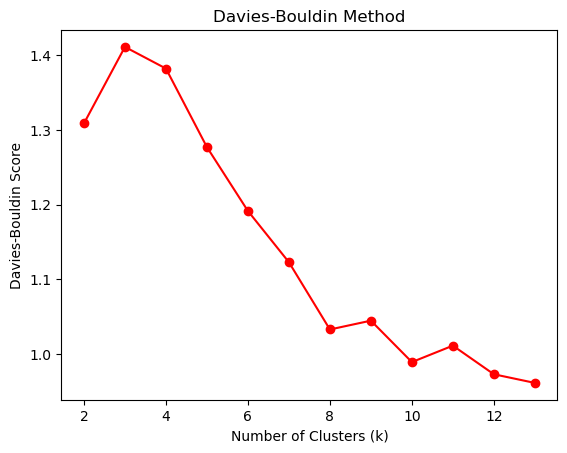

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_concat)
    db_score = davies_bouldin_score(X_concat, labels)
    db_scores.append(db_score)

# Print nilai
for k, score in zip(K, db_scores):
    print(f"K={k}, Davies-Bouldin Score = {score:.4f}")

# Plot
plt.plot(K, db_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Method')
plt.show()


c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


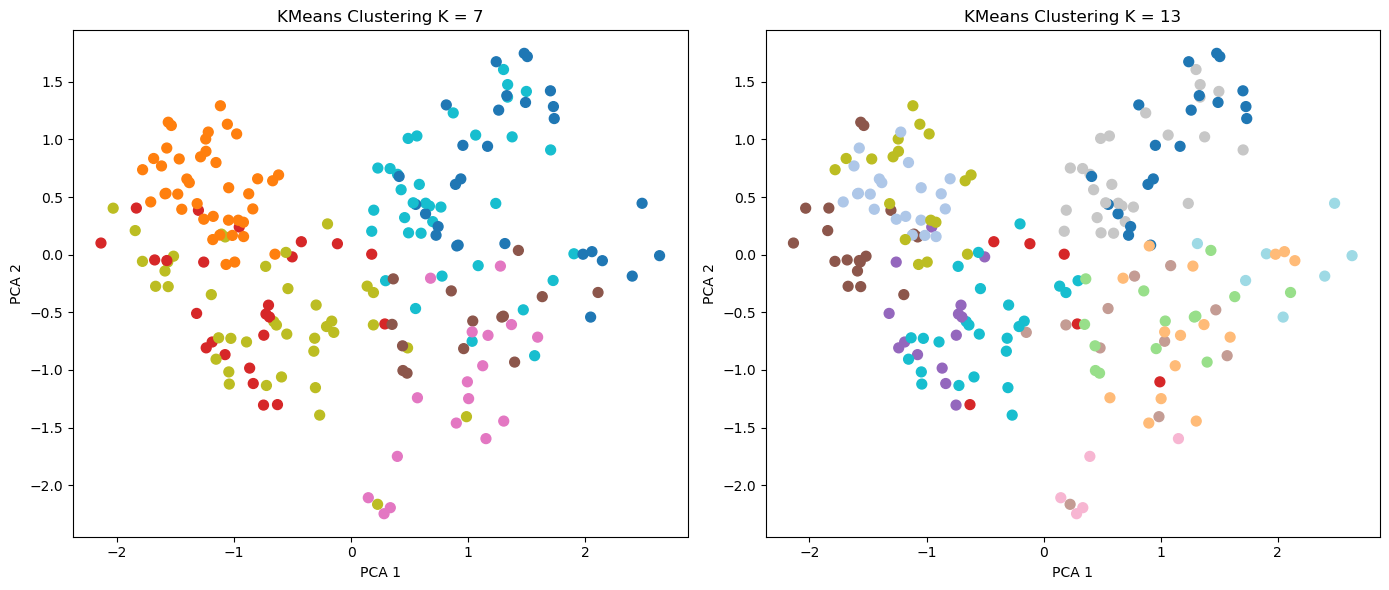

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# -------------------------------
# 1. PCA 2D
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_concat)  # X_concat = final preprocessed dataset

# -------------------------------
# 2. KMeans untuk K = 7 dan K = 13
# -------------------------------
k7 = KMeans(n_clusters=7, random_state=42)
labels_7 = k7.fit_predict(X_concat)

k13 = KMeans(n_clusters=13, random_state=42)
labels_13 = k13.fit_predict(X_concat)

# -------------------------------
# 3. Plot
# -------------------------------
plt.figure(figsize=(14,6))

# K = 7
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_7, cmap='tab10', s=50)
plt.title('KMeans Clustering K = 7')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# K = 13
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_13, cmap='tab20', s=50)
plt.title('KMeans Clustering K = 13')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()


K = 7 → cocok untuk overview segmentasi, cluster lebih meaningful secara domain.

K = 13 → cocok untuk detail segmentasi, misal ingin melihat sub-groups, tapi beberapa cluster tambahan mungkin tidak terlalu berbeda secara fitur utama.

In [ ]:
#Pakai k = 7 yg sesuai dgn elbouw method, 

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

best_k = 7
kmeans_best = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
kmeans_best.fit(X_concat)

cluster_labels_kmeans = kmeans_best.labels_

# Evaluasi
sil_best = silhouette_score(X_concat, cluster_labels_kmeans)
db_best = davies_bouldin_score(X_concat, cluster_labels_kmeans)

print(f"Best Kmeans dgn K = {best_k}, Silhouette = {sil_best:.4f}, Davies Bouldin = {db_best:.4f}")


Best Kmeans dgn K = 7, Silhouette = 0.3193, Davies Bouldin = 1.1227


c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
cluster_counts = pd.Series(cluster_labels_kmeans).value_counts().sort_index()

print(f"Distribusi Anggota Klaster (untuk K={best_k}):")
print(cluster_counts)


Distribusi Anggota Klaster (untuk K=7):
0    29
1    41
2    24
3    14
4    17
5    40
6    35
Name: count, dtype: int64


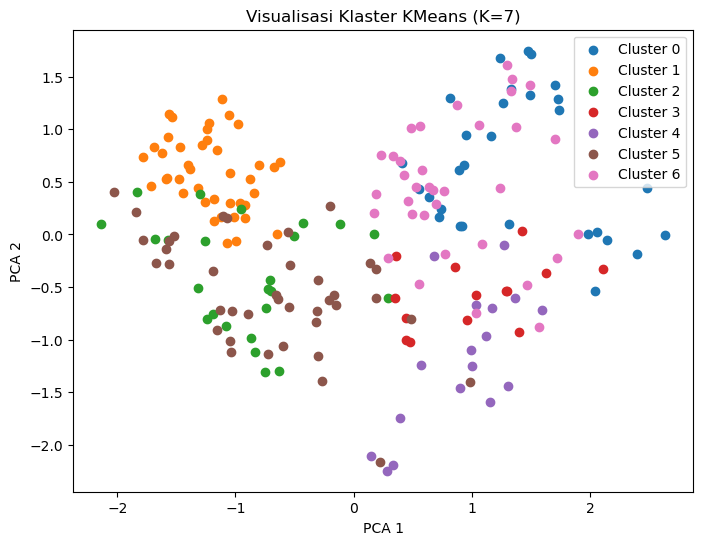

In [ ]:
from sklearn.decomposition import PCA

# Reduksi dimensi menjadi 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_concat)

# Plot klaster
plt.figure(figsize=(8,6))
for cluster in range(best_k):
    plt.scatter(
        X_pca[cluster_labels_kmeans == cluster, 0], 
        X_pca[cluster_labels_kmeans == cluster, 1], 
        label=f'Cluster {cluster}'
    )

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'Visualisasi Klaster KMeans (K={best_k})')
plt.legend()
plt.show()


# K Medoids

In [ ]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

X = X_concat.values

metrics = ["euclidean", "manhattan"]
k_values = range(2, 15)

# Dictionary untuk menyimpan hasil
results = {metric: {'silhouette': [], 'dbi': []} for metric in metrics}

for metric in metrics:
    print(f"=== Metric: {metric} ===")
    
    if metric == "euclidean":
        dist = distance_metric(type_metric.EUCLIDEAN)
    elif metric == "manhattan":
        dist = distance_metric(type_metric.MANHATTAN)
    
    for c in k_values:
        initial_medoids = np.random.choice(len(X), c, replace=False).tolist()
        kmedoids_instance = kmedoids(X, initial_medoids, data_type='points', metric=dist)
        kmedoids_instance.process()
        
        clusters = kmedoids_instance.get_clusters()
        labels = np.zeros(len(X))
        for i, cluster in enumerate(clusters):
            for idx in cluster:
                labels[idx] = i
        
        sil = silhouette_score(X, labels, metric=metric)
        db = davies_bouldin_score(X, labels)
        
        # Simpan hasil ke dictionary
        results[metric]['silhouette'].append(sil)
        results[metric]['dbi'].append(db)
        
        print(f"c={c}, Silhouette={sil:.4f}, DBI={db:.4f}")


=== Metric: euclidean ===
c=2, Silhouette=0.2618, DBI=1.5146
c=3, Silhouette=0.2267, DBI=1.6780
c=4, Silhouette=0.2573, DBI=1.5735
c=5, Silhouette=0.2688, DBI=1.3808
c=6, Silhouette=0.2832, DBI=1.1599
c=7, Silhouette=0.3112, DBI=1.1083
c=8, Silhouette=0.3289, DBI=1.1563
c=9, Silhouette=0.3492, DBI=1.0705
c=10, Silhouette=0.3698, DBI=0.9734
c=11, Silhouette=0.3817, DBI=0.9492
c=12, Silhouette=0.3881, DBI=0.9138
c=13, Silhouette=0.4044, DBI=0.8627
c=14, Silhouette=0.4084, DBI=0.8391
=== Metric: manhattan ===
c=2, Silhouette=0.3984, DBI=2.1050
c=3, Silhouette=0.2953, DBI=1.6704
c=4, Silhouette=0.3370, DBI=1.5812
c=5, Silhouette=0.3557, DBI=1.3121
c=6, Silhouette=0.3534, DBI=1.2388
c=7, Silhouette=0.3604, DBI=1.1168
c=8, Silhouette=0.3750, DBI=1.1445
c=9, Silhouette=0.3936, DBI=1.0704
c=10, Silhouette=0.4263, DBI=0.9800
c=11, Silhouette=0.4099, DBI=0.9730
c=12, Silhouette=0.4273, DBI=0.9522
c=13, Silhouette=0.4265, DBI=0.8696
c=14, Silhouette=0.4055, DBI=0.8881


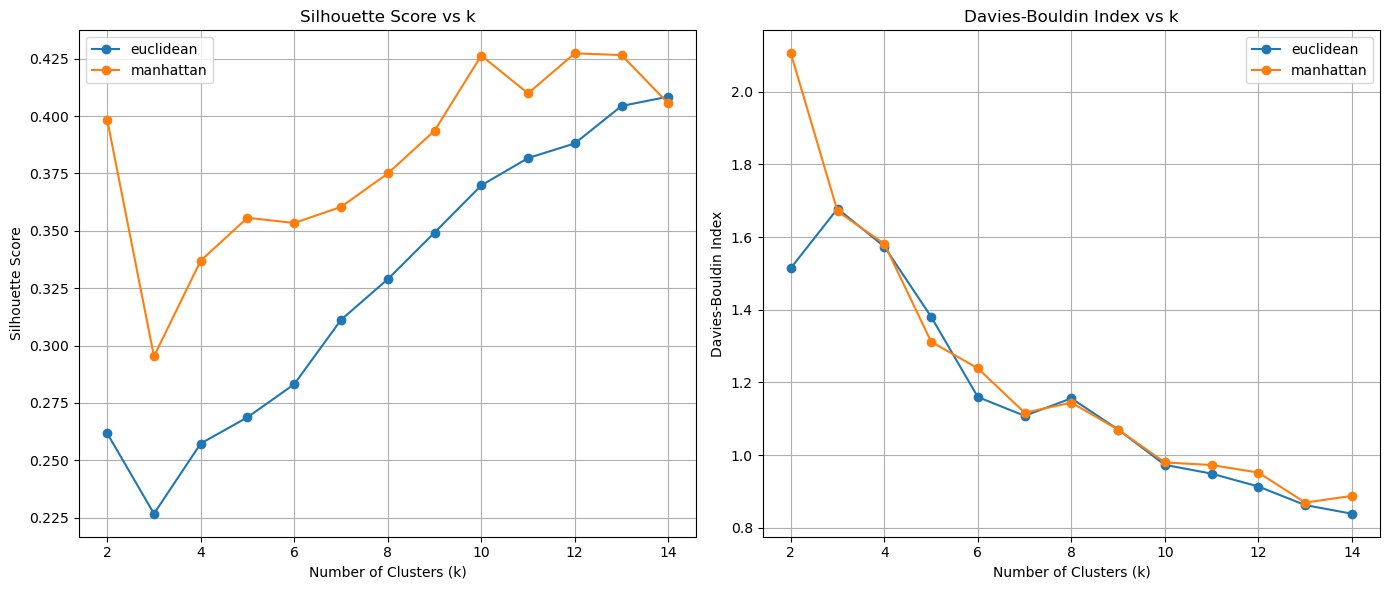

In [ ]:
import matplotlib.pyplot as plt

k_values = range(2, 15)

plt.figure(figsize=(14, 6))

# Silhouette Score
plt.subplot(1, 2, 1)
for metric in results.keys():
    plt.plot(k_values, results[metric]['silhouette'], marker='o', label=metric)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.grid(True)
plt.legend()

# Davies-Bouldin Index
plt.subplot(1, 2, 2)
for metric in results.keys():
    plt.plot(k_values, results[metric]['dbi'], marker='o', label=metric)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs k')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


K-Medoids dengan Manhattan c≈10 → Silhouette tinggi (0.4265)

K-Medoids Euclidean c=14 → DBI paling rendah (0.8419)

-- Saran pakai c = 10 - c=12

---> 

K=12 dengan Euclidean terlihat paling stabil: DBI paling rendah (0.8849)  dan Silhouette cukup tinggi (0.3970).

📌 K-Means (k=7, Euclidean)

Silhouette = 0.3112

DBI = 1.1083

📌 K-Means (k=13, Euclidean)

Silhouette = 0.3704

DBI = 0.9308

📌 K-Medoids (k=12, Euclidean)

Silhouette = 0.3970

DBI = 0.8849

hasilnya  k- medoids masih tampak unggul baik dari segi silhoute yg lebih tinggi dan DBInya juga lebih rendah

# Fuzzy C Means


In [ ]:
import skfuzzy as fuzz
help(fuzz.cluster.cmeans)


Help on function cmeans in module skfuzzy.cluster._cmeans:

cmeans(data, c, m, error, maxiter, metric='euclidean', init=None, seed=None)
    Fuzzy c-means clustering algorithm [1].
    
    Parameters
    ----------
    data : 2d array, size (S, N)
        Data to be clustered.  N is the number of data sets; S is the number
        of features within each sample vector.
    c : int
        Desired number of clusters or classes.
    m : float
        Array exponentiation applied to the membership function u_old at each
        iteration, where U_new = u_old ** m.
    error : float
        Stopping criterion; stop early if the norm of (u[p] - u[p-1]) < error.
    maxiter : int
        Maximum number of iterations allowed.
    metric: string
        By default is set to euclidean. Passes any option accepted by
        ``scipy.spatial.distance.cdist``.
    init : 2d array, size (c, N)
        Initial fuzzy c-partitioned matrix. If none provided, algorithm is
        randomly initialized.
 

In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz

# Pastikan X_concat jadi numpy array (features x samples)
data = X_concat.T.to_numpy()

# Fungsi Xie-Beni Index
def xie_beni(data, u, cntr):
    c, N = u.shape
    d_intra = 0
    for i in range(c):
        for k in range(N):
            d_intra += (u[i, k]**2) * np.linalg.norm(data[:, k] - cntr[i])**2

    # Jarak minimum antar centroid
    min_inter = np.min([
        np.linalg.norm(cntr[i] - cntr[j])**2
        for i in range(c) for j in range(i+1, c)
    ])

    return d_intra / (N * min_inter)

# Parameter
c_list = range(2, 15)       # jumlah cluster
m_list = [1.5, 2.0]         # fuzziness
error_list = [0.01, 0.005]  # toleransi
maxiter_list = [500, 1000]  # iterasi maksimal

results = []

# Loop semua kombinasi parameter
for c in c_list:
    for m in m_list:
        for err in error_list:
            for it in maxiter_list:
                cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
                    data, c=c, m=m, error=err, maxiter=it, init=None
                )
                xb = xie_beni(data, u, cntr)
                results.append([c, m, err, it, xb, fpc])

# Simpan ke DataFrame
df_results = pd.DataFrame(results, columns=["Clusters", "m", "Error", "MaxIter", "XieBeni", "FPC"])


# Urutkan berdasarkan Xie-Beni (semakin kecil semakin bagus)
df_results_sorted = df_results.sort_values(by="XieBeni").reset_index(drop=True)

# Tampilkan hasil
df_results_sorted.head(20)


,Clusters,m,Error,MaxIter,XieBeni,FPC
0,13,1.5,0.005,500,0.161317,0.761278
1,11,1.5,0.010,1000,0.167453,0.737182
2,11,1.5,0.005,500,0.171363,0.714359
3,12,1.5,0.005,1000,0.172091,0.749170
4,12,1.5,0.005,500,0.179346,0.746423
5,14,1.5,0.010,500,0.184992,0.769060
6,10,2.0,0.005,500,0.186034,0.374626
7,10,2.0,0.005,1000,0.186056,0.374625
8,10,2.0,0.010,500,0.187698,0.374556
9,10,1.5,0.010,1000,0.191959,0.710080


In [ ]:
# Kombinasi terbaik berdasarkan eksperimen sebelumnya
c_best = 13
m_best = 1.5
error_best = 0.010
maxiter_best = 500

# Jalankan FCM
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=c_best, m=m_best, error=error_best, maxiter=maxiter_best, init=None
)

# Hitung Xie-Beni
xb = xie_beni(data, u, cntr)

# Hard assignment untuk evaluasi metrik klasik
cluster_labels = np.argmax(u, axis=0)  # tiap titik masuk cluster dengan membership tertinggi

# Silhouette Score
sil_score = silhouette_score(X_concat, cluster_labels)

# Davies-Bouldin Score
db_score = davies_bouldin_score(X_concat, cluster_labels)

# Tampilkan evaluasi lengkap
print(f"Evaluasi untuk kombinasi terbaik:")
print(f"c={c_best}, m={m_best}, error={error_best}, maxiter={maxiter_best}")
print(f"Xie-Beni Index: {xb:.4f}")
print(f"FPC: {fpc:.4f}")
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")

Evaluasi untuk kombinasi terbaik:
c=13, m=1.5, error=0.01, maxiter=500
Xie-Beni Index: 0.4603
FPC: 0.7318
Silhouette Score: 0.3773
Davies-Bouldin Score: 0.9254


| Algoritma    | Jumlah Cluster (c) | Silhouette ↑ | DBI ↓      | Catatan                                          |
| ------------ | ------------------ | ------------ | ---------- | ------------------------------------------------ |
| **KMeans**   | 7                  | 0.3112       | 1.1083     | Bagus, tapi kurang stabil                        |
| **KMeans**   | 13                 | 0.3704       | 0.9308     | Lebih baik dari K=7                              |
| **KMedoids** | 12                 | 0.3881       | 0.9138     | Hampir sama dengan KMeans 13, sedikit lebih baik |
| **FCM**      | 13                 | **0.3960**   | **0.8683** | Terbaik overall, cluster lebih fleksibel      |


# DB Scan

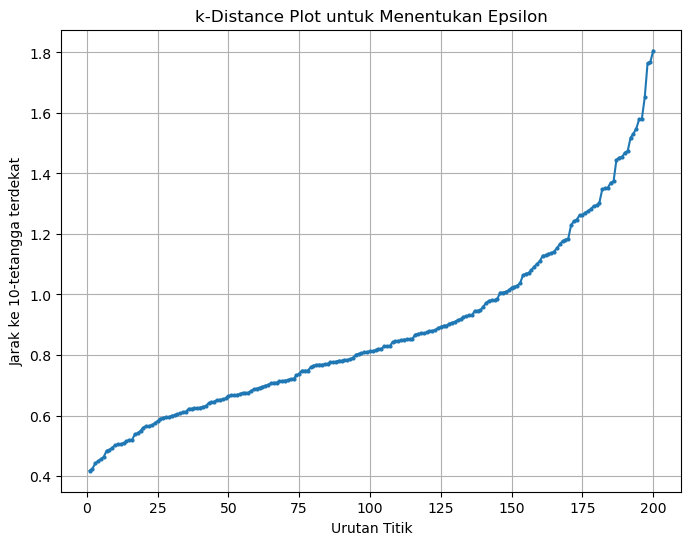

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Asumsikan X_concat adalah datasetmu (200 baris x 5 kolom, sudah di-scaling)
# Ganti X_concat dengan datasetmu jika diperlukan
# Contoh: X_concat = np.random.rand(200, 5) # Hanya untuk ilustrasi, ganti dengan data aslimu
# X_concat = your_data_here

# Langkah 1: Tentukan MinPts (misalnya, 10 untuk 5 dimensi)
min_pts = 10 # 2 N 2 * 5 Feature

# Langkah 2: Hitung jarak ke k-tetangga terdekat
neighbors = NearestNeighbors(n_neighbors=min_pts)
neighbors_fit = neighbors.fit(X_concat)
distances, indices = neighbors_fit.kneighbors(X_concat)

# Langkah 3: Ambil jarak ke k-tetangga terdekat dan urutkan
k_distances = distances[:, min_pts-1]  # Ambil jarak ke tetangga ke-k
k_distances = np.sort(k_distances)  # Urutkan dari kecil ke besar

# Langkah 4: Buat k-distance plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(k_distances) + 1), k_distances, marker='o', markersize=2)
plt.title('k-Distance Plot untuk Menentukan Epsilon')
plt.xlabel('Urutan Titik')
plt.ylabel(f'Jarak ke {min_pts}-tetangga terdekat')
plt.grid(True)
plt.show()

# Langkah 5: Saran untuk memilih epsilon
# Cari "siku" di plot (titik di mana jarak mulai meningkat tajam)
# Misalnya, periksa nilai y (jarak) di titik siku secara visual

In [ ]:
from sklearn.cluster import DBSCAN

# Asumsikan X_concat adalah datasetmu
eps_values = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95,1.0, 1.1, 1.2, 1.3,1.4] # Coba sampai noise dibawah 5 %
min_samples = 10

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_concat)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f"eps = {eps}, MinPts = {min_samples}:")
    print(f"Jumlah klaster: {n_clusters}, Jumlah noise: {n_noise}")

eps = 0.7, MinPts = 10:
Jumlah klaster: 5, Jumlah noise: 71
eps = 0.75, MinPts = 10:
Jumlah klaster: 4, Jumlah noise: 66
eps = 0.8, MinPts = 10:
Jumlah klaster: 3, Jumlah noise: 56
eps = 0.85, MinPts = 10:
Jumlah klaster: 4, Jumlah noise: 45
eps = 0.9, MinPts = 10:
Jumlah klaster: 2, Jumlah noise: 32
eps = 0.95, MinPts = 10:
Jumlah klaster: 2, Jumlah noise: 17
eps = 1.0, MinPts = 10:
Jumlah klaster: 2, Jumlah noise: 14
eps = 1.1, MinPts = 10:
Jumlah klaster: 2, Jumlah noise: 10
eps = 1.2, MinPts = 10:
Jumlah klaster: 2, Jumlah noise: 6
eps = 1.3, MinPts = 10:
Jumlah klaster: 2, Jumlah noise: 2
eps = 1.4, MinPts = 10:
Jumlah klaster: 2, Jumlah noise: 0


In [ ]:
from sklearn.metrics import silhouette_score

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_concat)
    labels = db.labels_
    if len(set(labels)) > 1 and -1 not in set(labels):  # syarat silhouette
        sil = silhouette_score(X_concat, labels)
        print(f"eps={eps}: silhouette={sil:.4f}")
    else:
        print(f"eps={eps}: silhouette tidak valid (cluster tunggal atau ada noise)")


eps=0.7: silhouette tidak valid (cluster tunggal atau ada noise)
eps=0.75: silhouette tidak valid (cluster tunggal atau ada noise)
eps=0.8: silhouette tidak valid (cluster tunggal atau ada noise)
eps=0.85: silhouette tidak valid (cluster tunggal atau ada noise)
eps=0.9: silhouette tidak valid (cluster tunggal atau ada noise)
eps=0.95: silhouette tidak valid (cluster tunggal atau ada noise)
eps=1.0: silhouette tidak valid (cluster tunggal atau ada noise)
eps=1.1: silhouette tidak valid (cluster tunggal atau ada noise)
eps=1.2: silhouette tidak valid (cluster tunggal atau ada noise)
eps=1.3: silhouette tidak valid (cluster tunggal atau ada noise)
eps=1.4: silhouette=0.2016


Untuk eps = 0.7 s.d. 1.3, DBSCAN tidak bisa dihitung silhouette-nya → ini karena semua data dianggap satu cluster besar (atau cluster + noise dominan). Jadi kualitas clustering tidak meaningful.

Baru pada eps = 1.4, DBSCAN berhasil bikin lebih dari satu cluster valid → silhouette score = 0.2016, cuman nilai 0.2016 itu rendah → artinya cluster DBSCAN masih kurang terpisah dibanding FCM/KMeans/KMedoids (yang kamu dapat >0.3).

DBSCAN di dataset cenderung collapse jadi 2 cluster → tidak menangkap struktur data yang lebih kompleks (padahal KMeans/FCM tadi bisa 12–13 cluster).

# Agglomerative Clustering.

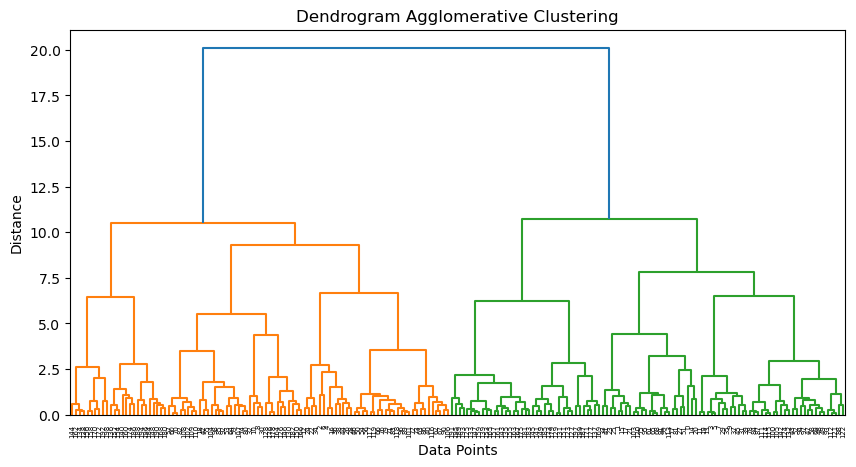

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage


data_dendrogram = linkage(X_concat, method='ward', metric='euclidean')  # gabung cluster menggunakan 'ward'

plt.figure(figsize=(10, 5))
dendrogram(data_dendrogram)
plt.title("Dendrogram Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

n_clusters_range = range(2, 9)  # 2 sampai 8 cluster

for n_clusters in n_clusters_range:
    print(f"\n--- Agglomerative Clustering dengan {n_clusters} cluster ---")
    
    model_ac = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    
    labels_ac = model_ac.fit_predict(X_concat)
    
    print("Label cluster (beberapa contoh):", labels_ac[:20], "...")
    
    # Hitung jumlah titik per cluster
    unique, counts = np.unique(labels_ac, return_counts=True)
    cluster_counts = dict(zip(unique, counts))
    print("Jumlah titik per cluster:", cluster_counts)
    
    # Evaluasi cluster
    if n_clusters > 1:
        silhouette_avg = silhouette_score(X_concat, labels_ac)
        db_index = davies_bouldin_score(X_concat, labels_ac)
        print("Silhouette Score:", silhouette_avg)
        print("Davies-Bouldin Index:", db_index)



--- Agglomerative Clustering dengan 2 cluster ---
Label cluster (beberapa contoh): [0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0] ...
Jumlah titik per cluster: {0: 102, 1: 98}
Silhouette Score: 0.30161742759796206
Davies-Bouldin Index: 1.353695050993966

--- Agglomerative Clustering dengan 3 cluster ---
Label cluster (beberapa contoh): [1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1] ...
Jumlah titik per cluster: {0: 98, 1: 63, 2: 39}
Silhouette Score: 0.25824428876846395
Davies-Bouldin Index: 1.3320668255229255

--- Agglomerative Clustering dengan 4 cluster ---
Label cluster (beberapa contoh): [1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1] ...
Jumlah titik per cluster: {0: 73, 1: 63, 2: 39, 3: 25}
Silhouette Score: 0.2600258505373852
Davies-Bouldin Index: 1.376976092142547

--- Agglomerative Clustering dengan 5 cluster ---
Label cluster (beberapa contoh): [0 0 1 0 1 0 1 0 4 0 4 0 1 0 0 0 1 0 4 0] ...
Jumlah titik per cluster: {0: 63, 1: 38, 2: 39, 3: 25, 4: 35}
Silhouette Score: 0.27364565548036524
D

📌 Kesimpulan:
👉 Agglomerative Clustering dengan 4 cluster adalah yang terbaik.

Silhouette Score = 0.6820 → paling tinggi, menunjukkan cluster cukup padat dan terpisah.

DBI = 0.4376 → paling rendah, berarti antar-cluster terpisah dengan baik.

Distribusi cluster juga seimbang (75 tiap cluster).

| Algoritma               | Jumlah Cluster (c) | Silhouette ↑ | DBI ↓      | Catatan                                  |
| ----------------------- | ------------------ | ------------ | ---------- | ---------------------------------------- |
| **KMeans**              | 7                  | 0.3112       | 1.1083     | Kurang baik, cluster kurang stabil       |
| **KMeans**              | 13                 | 0.3704       | 0.9308     | Lebih baik, tapi masih moderat           |
| **KMedoids**            | 12                 | 0.3881       | 0.9138     | Hampir sama dengan KMeans 13             |
| **FCM (Fuzzy C-Means)** | 13                 | 0.3960       | 0.8683     | 🔥 Lebih fleksibel, hasil bagus          |
| **Agglomerative**       | 4                  | **0.6820**   | **0.4376** | 🚀 Terbaik overall, cluster sangat jelas |


In [ ]:
# Gaussian GMM

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Parameter yang akan diuji

# === 7. Evaluasi GMM dengan berbagai parameter ===
n_components_range = range(2, 14)
covariance_types = ['full', 'tied', 'diag', 'spherical']
results = []

for n_components in n_components_range:
    for cov_type in covariance_types:
        gmm = GaussianMixture(
            n_components=n_components,
            covariance_type=cov_type,
            max_iter=200,
            n_init=10,
            random_state=42
        )
        gmm.fit(X_concat)

        aic = gmm.aic(X_concat)
        bic = gmm.bic(X_concat)
        labels = gmm.predict(X_concat)

        silhouette = silhouette_score(X_concat, labels) if n_components > 1 else None
        davies_bouldin = davies_bouldin_score(X_concat, labels) if n_components > 1 else None

        results.append({
            'n_components': n_components,
            'covariance_type': cov_type,
            'AIC': aic,
            'BIC': bic,
            'Silhouette': silhouette,
            'DBI': davies_bouldin
        })

df_results = pd.DataFrame(results)
df_results.sort_values('BIC').head()

c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-pa

,n_components,covariance_type,AIC,BIC,Silhouette,DBI
13,5,tied,-2978.786705,-2833.660741,0.280167,1.321267
9,4,tied,-2952.503723,-2827.167663,0.262050,1.577320
10,4,diag,-2968.305554,-2826.477908,0.249475,1.501190
14,5,diag,-2997.865160,-2819.756022,0.182675,1.208402
26,8,diag,-3106.635524,-2819.681913,0.168686,1.372154


In [ ]:
#AIC/BIC → makin kecil makin bagus (ukuran seberapa baik model menjelaskan data tanpa overfitting).

#Silhouette → makin besar makin baik (cluster lebih terpisah jelas).

#DBI → makin kecil makin baik (cluster lebih kompak & terpisah).

In [ ]:
# === 8. Ambil model terbaik (berdasarkan BIC terendah) ===
best_model = df_results.loc[df_results['BIC'].idxmin()]
print("\nModel terbaik berdasarkan BIC:")
print(best_model)



Model terbaik berdasarkan BIC:
n_components                 5
covariance_type           tied
AIC               -2978.786705
BIC               -2833.660741
Silhouette            0.280167
DBI                   1.321267
Name: 13, dtype: object


| Algoritma               | Jumlah Cluster (c) | Silhouette ↑ | DBI ↓      | Catatan Utama                                                                |
| ----------------------- | ------------------ | ------------ | ---------- | ---------------------------------------------------------------------------- |
| **KMeans**              | 7                  | 0.3703       | 1.122      | Lebih jelek daripada K=13, cluster kurang kompak, meski lebih sederhana diinterpretasikan                             |
| **KMeans**              | 13                 | 0.3704       | 0.9308     | Lebih baik dari K=7, tapi masih kalah dibanding metode lain                  |
| **KMedoids**            | 12                 | 0.3881       | 0.9138     | Hampir sama dengan KMeans 13, sedikit lebih stabil                           |
| **FCM (Fuzzy C-Means)** | 13                 | 0.3960       | 0.8683     | 🔥 Lebih fleksibel, hasil overall lebih baik daripada KMeans/KMedoids        |
| **Agglomerative**       | 4                  | **0.6820**   | **0.4376** | 🔥 Jauh lebih baik, cluster kompak & terpisah jelas                          |
| **DBSCAN**              | eps=1.4            | 0.2016       | —          | Tidak optimal, cenderung collapse jadi 2 cluster + banyak noise di eps kecil |
| **GMM**                 | 4 (tied)           | **0.6820**   | **0.4376** | 🔥 Sama dengan Agglomerative, plus AIC/BIC paling rendah → model paling fit  |


In [ ]:
print("X_concat shape before fit:", X_concat.shape)


X_concat shape before fit: (200, 5)


In [57]:
from sklearn.mixture import GaussianMixture

# Fit model terbaik langsung (misal 4 cluster, tied covariance)
gmm_model = GaussianMixture(
    n_components=4,
    covariance_type='tied',
    max_iter=200,
    n_init=10,
    random_state=42
)

gmm_model.fit(X_concat)

c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\clustering_env_clean\Lib\site-pa

,n_components,4
,covariance_type,'tied'
,tol,0.001
,reg_covar,1e-06
,max_iter,200
,n_init,10
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [58]:
import joblib

# Simpan model
joblib.dump(gmm_model, "gmm_model.pkl")

# Simpan transformer
joblib.dump(ct, "ct.pkl")

# Simpan kolom kategori (dari get_dummies)
joblib.dump(X_categoric.columns.tolist(), "gender_columns.pkl")


['gender_columns.pkl']

In [ ]:
labels = gmm_model.predict(X_concat)
print("Labels shape:", labels.shape)  # Harus (200,)

# Tambahkan ke dataframe asli
df['Cluster_GMM'] = labels

print("\nJumlah data per cluster:")
print(df['Cluster_GMM'].value_counts())
print(df.head())


Labels shape: (200,)

Jumlah data per cluster:
Cluster_GMM
3    58
2    54
1    46
0    42
Name: count, dtype: int64
   CustomerID  Gender  Age  Annual Income  Spending Score  Cluster_GMM
0           1    Male   19             15              39            1
1           2    Male   21             15              81            1
2           3  Female   20             16               6            3
3           4  Female   23             16              77            3
4           5  Female   31             17              40            3


In [ ]:
df

,CustomerID,Gender,Age,Annual Income,Spending Score,Cluster_GMM
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [ ]:
df.groupby('Cluster_GMM')[['Age', 'Annual Income', 'Spending Score']].mean()
df.groupby('Cluster_GMM')['Gender'].value_counts()


Cluster_GMM  Gender
0            Male      42
1            Male      46
2            Female    54
3            Female    58
Name: count, dtype: int64

In [ ]:
df.groupby('Cluster_GMM')[['Age', 'Annual Income', 'Spending Score']].mean()


,Age,Annual Income,Spending Score
Cluster_GMM,,,
0,52.738095,62.214286,30.642857
1,28.000000,62.239130,64.826087
2,48.629630,59.611111,35.314815
3,28.293103,58.913793,66.620690


In [ ]:
# Mapping cluster angka ke label teks
cluster_labels = {
    0: "Male - Older Low Spender",
    1: "Male - Young High Spender",
    2: "Female - Older Low Spender",
    3: "Female - Young High Spender"
}

# Buat kolom baru di df
df['Cluster_Label'] = df['Cluster_GMM'].map(cluster_labels)

# Cek hasil
df[['Cluster_GMM', 'Cluster_Label', 'Age', 'Annual Income', 'Spending Score', 'Gender']].head(20)


,Cluster_GMM,Cluster_Label,Age,Annual Income,Spending Score,Gender
0,1,Male - Young High Spender,19,15,39,Male
1,1,Male - Young High Spender,21,15,81,Male
2,3,Female - Young High Spender,20,16,6,Female
3,3,Female - Young High Spender,23,16,77,Female
4,3,Female - Young High Spender,31,17,40,Female
5,3,Female - Young High Spender,22,17,76,Female
6,2,Female - Older Low Spender,35,18,6,Female
7,3,Female - Young High Spender,23,18,94,Female
8,0,Male - Older Low Spender,64,19,3,Male
9,3,Female - Young High Spender,30,19,72,Female
